## Libraries

In [1]:
import numpy as np

import tensorflow as tf

from matplotlib import pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


tf.debugging.set_log_device_placement(True)

Using TensorFlow backend.


## Simple CNN on Minecraft Mobs
### Pre-processing screenshots

In [2]:
TRAIN_SIZE = 51
TEST_SIZE = 7
TARGET_SIZE = (240, 427)

train_samples = np.empty((TRAIN_SIZE, *TARGET_SIZE, 3)) #3 Channels -> R G B
test_samples  = np.empty((TEST_SIZE, *TARGET_SIZE, 3))


for i in range(TRAIN_SIZE):
    train_samples[i] = load_img('Data/train/'+str(i+1)+'.png', target_size=TARGET_SIZE)

for i in range(TEST_SIZE):
    test_samples[i] = load_img('Data/test/'+str(i+1)+'.png', target_size=TARGET_SIZE)

test_samples[0].shape

(240, 427, 3)

### Adding Label for Classifications

In [3]:
#0-Sheep
#1-Chicken
c_train_labels = np.array([
    0,0,0,0,0,
    0,0,0,0,0,
    1,0,1,0,1,
    1,1,1,1,1,
    1,1,1,1,1,
    0,0,0,1,1,
    1,1,1,1,1,
    1,1,1,0,0,
    0,0,0,0,0,
    0,0,0,0,1,
    1
    ])
print(c_train_labels.shape)

c_test_labels = np.array([
    0,0,1,1,1,
    1,0
    ])

(51,)


### Original Image

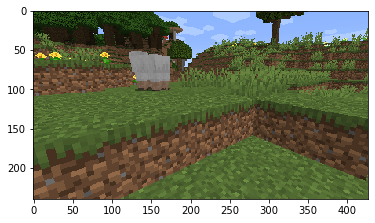

In [4]:

sample = train_samples[4,:,:,:]
plt.imshow(sample.astype(np.uint8), interpolation='nearest')
plt.show()

In [5]:
# Normalize
train_samples/=255
test_samples/=255

### Create Convolutional Model

In [6]:
# Create Convnet
convnet = Sequential()
convnet.add(Convolution2D(16, 4, 4, activation='relu', input_shape=(240, 427, 3)))
convnet.add(MaxPooling2D(pool_size=(2,2)))
convnet.add(Convolution2D(32, 4, 4, activation='relu'))
convnet.add(MaxPooling2D(pool_size=(2,2)))
convnet.add(Flatten())
convnet.add(Dense(1, activation='sigmoid'))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/t

In [7]:
convnet.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


### Fitting the train data

In [8]:
convnet.fit(train_samples, c_train_labels, batch_size=2, nb_epoch=26, verbose=1)

Epoch 1/26
Executing op __inference_keras_scratch_graph_550 in device /job:localhost/replica:0/task:0/device:GPU:0
51/51 [==============================] - 2s 38ms/step - loss: 0.3044 - accuracy: 0.4314
Epoch 2/26
51/51 [==============================] - 0s 9ms/step - loss: 0.2407 - accuracy: 0.6275
Epoch 3/26
51/51 [==============================] - 0s 9ms/step - loss: 0.2234 - accuracy: 0.6667
Epoch 4/26
51/51 [==============================] - 0s 9ms/step - loss: 0.2066 - accuracy: 0.7843
Epoch 5/26
51/51 [==============================] - 0s 9ms/step - loss: 0.1856 - accuracy: 0.9216
Epoch 6/26
51/51 [==============================] - 0s 9ms/step - loss: 0.1761 - accuracy: 0.8431
Epoch 7/26
51/51 [==============================] - 0s 9ms/step - loss: 0.1475 - accuracy: 0.9412
Epoch 8/26
51/51 [==============================] - 0s 9ms/step - loss: 0.1219 - accuracy: 0.9608
Epoch 9/26
51/51 [==============================] - 0s 9ms/step - loss: 0.1150 - accuracy: 0.9608
Epoch 10/26
5

In [9]:
metrics = convnet.evaluate(test_samples, c_test_labels, verbose=1)
print()
print("%s: %.2f%%" % (convnet.metrics_names[1], metrics[1]*100))
predictions = convnet.predict(test_samples)

Executing op __inference_keras_scratch_graph_4050 in device /job:localhost/replica:0/task:0/device:GPU:0
7/7 [==============================] - 0s 30ms/step

accuracy: 100.00%
Executing op __inference_keras_scratch_graph_4094 in device /job:localhost/replica:0/task:0/device:GPU:0


In [10]:
results = convnet.predict(test_samples)
for i, result in enumerate(results):
    print('Test Sample No.'+str(i+1), result, 'Sheep' if result < 0.5 else 'Chicken')

Test Sample No.1 [0.04494407] Sheep
Test Sample No.2 [0.02106707] Sheep
Test Sample No.3 [0.95994365] Chicken
Test Sample No.4 [0.9554739] Chicken
Test Sample No.5 [0.9615857] Chicken
Test Sample No.6 [0.97787845] Chicken
Test Sample No.7 [0.37347397] Sheep


In [11]:
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 237, 424, 16)      784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 212, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 115, 209, 32)      8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 104, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 189696)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 189697    
Total params: 198,705
Trainable params: 198,705
Non-trainable params: 0
________________________________________________

In [12]:
layersFeaturesSize=[16,16,32,32]

for layer in convnet.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
conv2d_1 (4, 4, 3, 16)
conv2d_2 (4, 4, 16, 32)


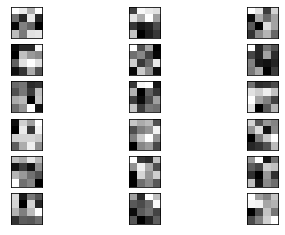

In [13]:

from matplotlib import pyplot
filters, biases = convnet.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

### Visualize feature maps

In [14]:
from keras.models import Model
from numpy import expand_dims

img = load_img('Data/train/3.png', target_size=(240, 427))
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img /=255
img = expand_dims(img, axis=0)

Executing op __inference_keras_scratch_graph_4121 in device /job:localhost/replica:0/task:0/device:GPU:0


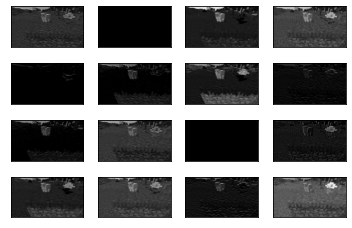

Executing op __inference_keras_scratch_graph_4135 in device /job:localhost/replica:0/task:0/device:GPU:0


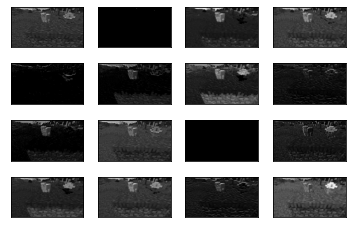

Executing op __inference_keras_scratch_graph_4156 in device /job:localhost/replica:0/task:0/device:GPU:0


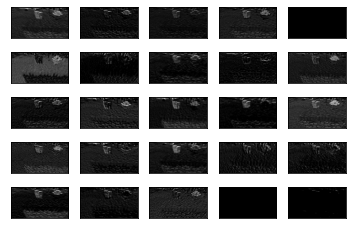

Executing op __inference_keras_scratch_graph_4178 in device /job:localhost/replica:0/task:0/device:GPU:0


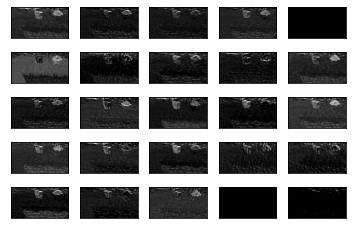

In [15]:
for i, featureSize in enumerate(layersFeaturesSize):
    model = Model(inputs=convnet.inputs, outputs=convnet.layers[i].output)
    feature_maps = model.predict(img)
    square = int(np.floor(np.sqrt(featureSize)))
    ix = 1
    fig = plt.figure()
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()
    fig.savefig('Feature'+str(i)+'.png', dpi=500)